Профессия Data Science  
Блок 1. Знакомство с данными. Python для анализа данных  
PYTHON-14. Очистка данных

1. Введение

Очистка данных (data cleaning) — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).

Цель очистки данных — избавиться от «мусора», который может помешать моделированию или исказить его результаты. Во многих задачах очистка данных — это самая главная часть этапа подготовки данных к построению модели, которая нередко занимает большую часть времени работы над задачей.

2. Знакомство с новыми данными: данные о квартирах от Сбера

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

display(sber_data.tail())

# Задание 2.1:
sber_data.info

# Задание 2.2:
sber_data.sub_area.value_counts()

# Задание 2.3:
sber_data.price_doc.max()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


111111112

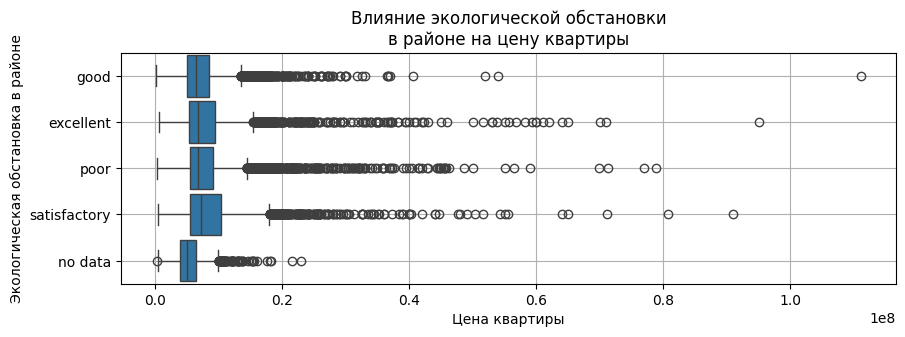

In [13]:
# Задание 2.4:
# Построим коробчатую диаграмму:
fig = plt.figure(figsize = (10, 3))
boxplot = sns.boxplot(
    data = sber_data,
    y = 'ecology',    
    x = 'price_doc',
    # Горизонтальная ориентация диаграммы:
    orient = 'h',
    # Ширина коробок:
    width = 0.9)
# Заголовок графика:
boxplot.set_title("""Влияние экологической обстановки
в районе на цену квартиры""");
# Присваиваем заголовки осей координат:
boxplot.set_xlabel('Цена квартиры');
boxplot.set_ylabel('Экологическая обстановка в районе');
# Выводим результат на экран:
boxplot.grid()

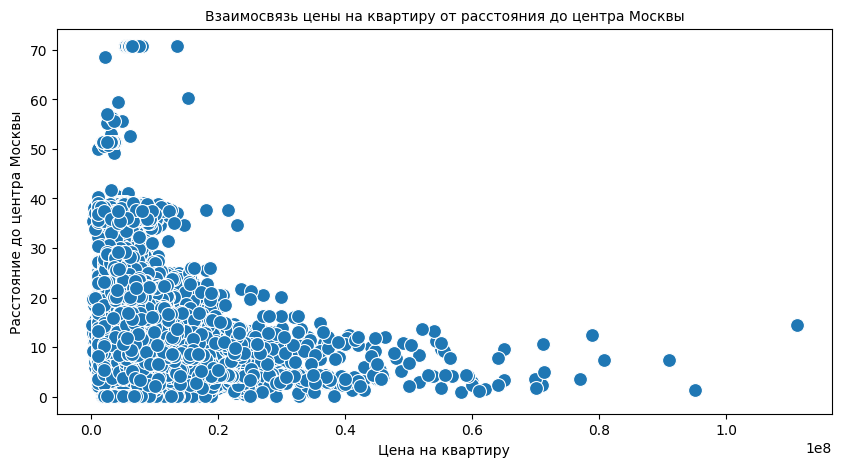

In [21]:
# Задание 2.5:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=sber_data,
    x='price_doc',
    y='kremlin_km',
    s=100,
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь цены на квартиру от расстояния до центра Москвы', fontsize=10)
scatterplot.set_xlabel('Цена на квартиру')
scatterplot.set_ylabel('Расстояние до центра Москвы');

Ответ:

Вариант B. Из отметок на оси абсцисс видно, что большая часть наблюдений (точек) находится в интервале от 0 до 40 км, далее частота резко падает.

Вариант C. Из построенного графика видно, что с ростом расстояния до центра города постепенно уменьшается значение стоимости квартир.

3. Работа с пропусками: как их обнаружить?